Cell 1: Import Libraries

In [2]:
# Import required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from kaggle_environments import make, evaluate


No pygame installed, ignoring import


Cell 2: Define Game Logic (Base Model)

In [3]:
# The board size
ROW_COUNT = 6
COLUMN_COUNT = 7

def create_board():
    """Create a 6*7 board"""
    board = np.zeros((ROW_COUNT, COLUMN_COUNT))
    return board

def drop_piece(board, row, col, piece):
    """Places a piece on the board"""
    board[row][col] = piece

def is_valid_location(board, col):
    """Checks if the board is valid"""
    return board[ROW_COUNT - 1][col] == 0

def get_next_open_row(board, col):
    """Finds the next open row in the column"""
    for r in range(ROW_COUNT):
        if board[r][col] == 0:
            return r
        
def choose_winning_move(board, piece):
    """
    Check if any move that can make the agent win in this turn
    """
    for col in range(COLUMN_COUNT):
        if is_valid_location(board, col): 
            row = get_next_open_row(board, col) # get the lowest empty col
            temp_board = board.copy() # simulation 
            drop_piece(temp_board, row, col, piece)
            
            if winning_move(temp_board, piece):
                return col
            
    return None 

def winning_move(board, piece):
    """Checks if a player has won"""
    # Check horizontal locations for win
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT):
            if board[r][c] == piece and board[r][c + 1] == piece and board[r][c + 2] == piece and board[r][c + 3] == piece:
                return True

    # Check vertical locations for win
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT - 3):
            if board[r][c] == piece and board[r + 1][c] == piece and board[r + 2][c] == piece and board[r + 3][c] == piece:
                return True

    # Check diagonals
    for c in range(COLUMN_COUNT - 3):
        for r in range(ROW_COUNT - 3):
            if board[r][c] == piece and board[r + 1][c + 1] == piece and board[r + 2][c + 2] == piece and board[r + 3][c + 3] == piece:
                return True

    for c in range(COLUMN_COUNT - 3):
        for r in range(3, ROW_COUNT):
            if board[r][c] == piece and board[r - 1][c + 1] == piece and board[r - 2][c + 2] == piece and board[r - 3][c + 3] == piece:
                return True


Cell 3: Visualization for Local Environment

In [4]:
def draw_board(board):
    """Draws the board using matplotlib"""
    plt.imshow(np.flip(board, 0), cmap='coolwarm', interpolation='nearest')
    plt.title('Connect 4 Board')
    plt.xticks(range(COLUMN_COUNT))
    plt.yticks(range(ROW_COUNT))
    plt.show()

def print_board(board):
    """Flips the board so the bottom row is at the bottom when visualizing"""
    print(np.flip(board, 0))


Create Agent

In [5]:
def agent_with_win_check(board, piece):
    """
    Our 2.0 agent that not only make random move, but it will check first are he have any chance to win in that turn or not
    """
    
    winning_move_col = choose_winning_move(board, piece)
    
    if winning_move_col is None:
        return random.choice([col for col in range(COLUMN_COUNT)])
    
    return winning_move_col

Cell 4: Local Game Simulation

Player 1 wins!
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 2. 2.]]


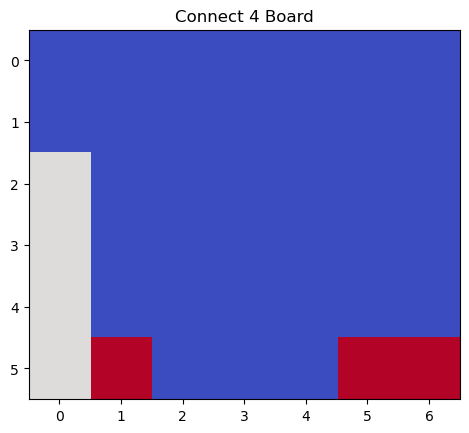

In [20]:
def play_game_local():
    """Main function for local simulation"""
    board = create_board()
    game_over = False
    turn = 0

    while not game_over:
        
        # Agent 1 with smarter logic
        if turn == 0:
            col = agent_with_win_check(board, turn)
        else:
            col = random.randint(0, COLUMN_COUNT - 1) # base agent 2
        
        if is_valid_location(board, col):
            row = get_next_open_row(board, col)
            drop_piece(board, row, col, turn + 1)
            
            if winning_move(board, turn + 1):
                print(f"Player {turn + 1} wins!")
                game_over = True

        turn += 1
        turn = turn % 2

    print_board(board)
    draw_board(board)

# Uncomment to play a local game
play_game_local()

Cell 5: Kaggle Agent Logic

In [10]:
# Kaggle environment setup
env = make("connectx", debug=True)

def kaggle_agent(obs, conf):
    """A sample agent for ConnectX in Kaggle"""
    valid_moves = [col for col in range(conf.columns) if obs.board[col] == 0]
    return random.choice(valid_moves)


Cell 6: Play Game in Kaggle Environment

In [15]:
def play_game_kaggle():
    """Play game in Kaggle environment"""
    env.render()
    trainer = env.train([None, "negamax"])  # Use Negamax agent as the opponent
    observation = trainer.reset()
    while not env.done:
        action = kaggle_agent(observation, env.configuration)
        observation, reward, done, info = trainer.step(action)
        env.render()
        

# Uncomment to play in Kaggle environment
play_game_kaggle()


Cell 7: Training and Evaluation in Kaggle Environment

In [12]:
def mean_reward(rewards):
    return "won {0} of {1}".format(sum(r[0] for r in rewards), len(rewards))

# Run multiple episodes to estimate its performance.
print("My Agent vs Random Agent:", mean_reward(evaluate("connectx", [kaggle_agent, "random"], num_episodes=10)))
print("My Agent vs Negamax Agent:", mean_reward(evaluate("connectx", [kaggle_agent, "negamax"], num_episodes=10)))


My Agent vs Random Agent: won 0 of 10
My Agent vs Negamax Agent: won -10 of 10
